In [1]:
"""
绘制台风登陆的图
"""
import shapely.geometry as sgmen
import shapely
import shapefile
import numpy as np
from scipy import stats
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cnmaps import get_adm_maps,draw_maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
filepath = glob.glob(r'D:\WORKcode\pythoncode\ncdata\typath\CMA_csv\*')
coastline = shapefile.Reader("D:\\maplist\\coastline\\ne_110m_coastline.shp")
coastline1 = coastline
border = coastline1.shapes()

In [3]:
alist=[]
for i in filepath:
    if int(i[-8:-4]) not in np.arange(2003,2020,1):
        continue
    print(i[-8:-4])
    df=pd.read_excel(i)
    # 去除重复的名字
    namelist=df['name_en'].drop_duplicates().reset_index()['name_en']
    for j in [94,65,66]:
        for name_i in namelist:
            temp=df[df['name_en']==name_i]
            tyline=sgmen.LineString(zip(temp['lon'],temp['lat']))
            coast_points=border[j].points
            coast_line=sgmen.LineString(coast_points)
            xiang_jiao=tyline.intersection(coast_line)
            if xiang_jiao.is_empty:
                continue
            alist.append(xiang_jiao)

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [4]:
print(alist[3].geoms[:])

MULTIPOINT (110.33017194565478 20.328997120551932, 109.78491063657036 20.572953901429013, 107.75438798352882 21.362838548449304)


In [5]:
alist[0].coords.xy[0][0]

106.07383536360199

In [20]:
Xlon = []
Ylat = []
rouNum = 1
for i in alist:
    if type(i) == shapely.geometry.multipoint.MultiPoint:
        for j in i.geoms[:]:
            Xlon.append(round(j.xy[0][0], rouNum))
            Ylat.append(round(j.xy[1][0], rouNum))
    else:
        Xlon.append(round(i.coords.xy[0][0], rouNum))
        Ylat.append(round(i.coords.xy[1][0], rouNum))

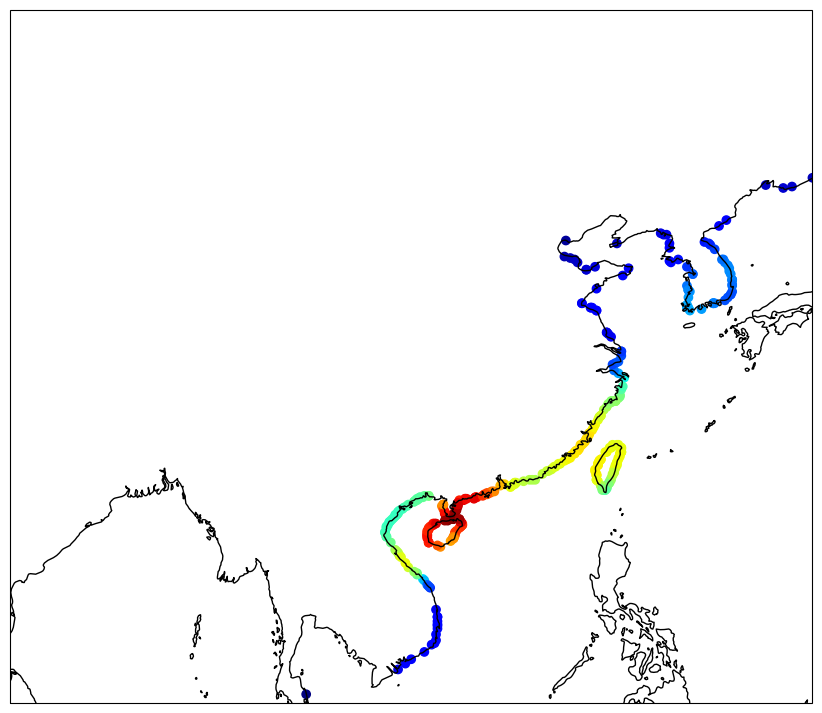

In [22]:
box1 = [80, 135, 7.5, 55]
fig = plt.figure(figsize=(16, 9))
ax = fig.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('50m')
ax.set_extent(box1, crs=ccrs.PlateCarree())
xy = np.vstack([Xlon, Ylat])
z = stats.gaussian_kde(xy)(xy)
colorbar = ax.scatter(Xlon[:], Ylat[:], c=z,
                      cmap='jet', transform=ccrs.PlateCarree())
# plt.colorbar(colorbar)

[0.06316038 0.06316038 0.06458857 0.06458857 0.01822392 0.03565842
 0.02212827 0.03630182 0.03256321]
[4 6 8 5 7 0 1 2 3]


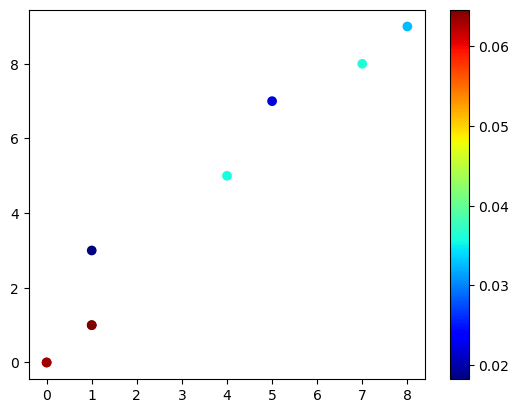

In [9]:
x = [0, 0, 1, 1, 1, 4, 5, 7, 8]
y = [0, 0, 1, 1, 3, 5, 7, 8, 9]
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
print(z)
idx = z.argsort()
print(idx)
# x, y, z = x[idx], y[idx], z[idx]
colorbar = plt.scatter(x, y, c=z, cmap='jet')
plt.colorbar(colorbar)